In [22]:
from itertools import combinations

import pandas as pd
import numpy as np

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix

%matplotlib inline
plt.rcParams['figure.figsize'] = (10., 8.)
plt.style.use('seaborn')

In [23]:
data = pd.read_csv('churn_analysis.csv')
data.head()

,Unnamed: 0,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,0,KS,128,415,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,False.
1,1,OH,107,415,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,False.
2,2,NJ,137,415,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,False.
3,3,OH,84,408,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,False.
4,4,OK,75,415,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,False.


In [26]:
data.churn = data.churn.map({'True.': 1, 'False.': 0})

In [31]:
treated_subset = data[data['treatment'] == 1]

In [54]:
# без поправки Иейтса
pvals = []

for combination in combinations(set(data.state), 2):
    print('Combination:', combination)
    sample1 = treated_subset[treated_subset.state == combination[0]].churn
    sample2 = treated_subset[treated_subset.state == combination[1]].churn
    
    matrix = np.vstack((np.bincount(sample1, minlength=2), np.bincount(sample2, minlength=2)))
    pvalue = sts.chi2_contingency(matrix, correction=False)[1]
    pvals.append(pvalue)
    print('P-value:', pvalue)
    
pvals = np.array(pvals)

Combination: ('OR', 'KY')
P-value: 0.8719079858673553
Combination: ('OR', 'PA')
P-value: 0.5196737176275111
Combination: ('OR', 'NJ')
P-value: 0.8259860275463201
Combination: ('OR', 'MI')
P-value: 0.47705458077401486
Combination: ('OR', 'IL')
P-value: 0.6142708143014636
Combination: ('OR', 'AZ')
P-value: 0.7195818962392516
Combination: ('OR', 'NC')
P-value: 0.8941865809995517
Combination: ('OR', 'MA')
P-value: 0.23095845744479768
Combination: ('OR', 'OK')
P-value: 0.9299390200128878
Combination: ('OR', 'CO')
P-value: 0.47705458077401486
Combination: ('OR', 'SD')
P-value: 0.9045366817703543
Combination: ('OR', 'NV')
P-value: 0.37002771166226167
Combination: ('OR', 'TN')
P-value: 0.6142708143014636
Combination: ('OR', 'IA')
P-value: 0.9350750943221893
Combination: ('OR', 'CA')
P-value: 0.17533414377659687
Combination: ('OR', 'FL')
P-value: 0.6750824839622213
Combination: ('OR', 'ID')
P-value: 0.7675154234584048
Combination: ('OR', 'WY')
P-value: 0.5952889943053778
Combination: ('OR', 'NE

P-value: 0.2927431919088561
Combination: ('MI', 'IA')
P-value: 0.4738051214221515
Combination: ('MI', 'CA')
P-value: 0.47570298581445314
Combination: ('MI', 'FL')
P-value: 0.2690041280401211
Combination: ('MI', 'ID')
P-value: 0.3360950321377356
Combination: ('MI', 'WY')
P-value: 0.2162689684978003
Combination: ('MI', 'NE')
P-value: 0.3606364192650545
Combination: ('MI', 'MN')
P-value: 0.24107225524141618
Combination: ('MI', 'AL')
P-value: 0.5837919716910429
Combination: ('MI', 'WV')
P-value: 0.50914627158656
Combination: ('MI', 'OH')
P-value: 0.17456841852545973
Combination: ('MI', 'GA')
P-value: 0.24107225524141618
Combination: ('MI', 'AK')
P-value: 0.10106627292864327
Combination: ('MI', 'SC')
P-value: 0.9330799579483646
Combination: ('MI', 'MO')
P-value: 0.7668603867400653
Combination: ('MI', 'AR')
P-value: 0.5558181384745972
Combination: ('MI', 'RI')
P-value: 0.7085968149359227
Combination: ('MI', 'ME')
P-value: 0.6400320760673228
Combination: ('MI', 'LA')
P-value: 0.04710143613578

P-value: 0.8453179761559215
Combination: ('OK', 'WA')
P-value: 0.31650259225579497
Combination: ('OK', 'TX')
P-value: 0.3384260482573018
Combination: ('OK', 'CT')
P-value: 0.9167046862949899
Combination: ('OK', 'VT')
P-value: 0.6435628144522001
Combination: ('OK', 'MT')
P-value: 1.0
Combination: ('OK', 'NY')
P-value: 0.8216920052089061
Combination: ('OK', 'WI')
P-value: 0.5096288657863597
Combination: ('OK', 'MD')
P-value: 0.686225391926601
Combination: ('OK', 'IN')
P-value: 0.8453179761559215
Combination: ('OK', 'UT')
P-value: 0.8319811210997246
Combination: ('OK', 'DC')
P-value: 0.3346788285103265
Combination: ('OK', 'NH')
P-value: 0.9303876922688853
Combination: ('OK', 'KS')
P-value: 0.3855103123401462
Combination: ('OK', 'DE')
P-value: 0.38996060260166654
Combination: ('OK', 'MS')
P-value: 0.9195494059457643
Combination: ('OK', 'ND')
P-value: 0.8064389589406287
Combination: ('OK', 'NM')
P-value: 0.38631053069215326
Combination: ('OK', 'HI')
P-value: 0.539314576119204
Combination: (

Combination: ('ID', 'RI')
P-value: 0.5332493556237107
Combination: ('ID', 'ME')
P-value: 0.1611591541724391
Combination: ('ID', 'LA')
P-value: 0.18286394475734802
Combination: ('ID', 'VA')
P-value: 0.8511520701857814
Combination: ('ID', 'WA')
P-value: 0.13794347533139323
Combination: ('ID', 'TX')
P-value: 0.15384529794061327
Combination: ('ID', 'CT')
P-value: 0.5975245466272019
Combination: ('ID', 'VT')
P-value: 0.36942847674745427
Combination: ('ID', 'MT')
P-value: 0.6846464568197016
Combination: ('ID', 'NY')
P-value: 0.5069898309357475
Combination: ('ID', 'WI')
P-value: 0.7615176182733531
Combination: ('ID', 'MD')
P-value: 0.40278369424647564
Combination: ('ID', 'IN')
P-value: 0.8511520701857814
Combination: ('ID', 'UT')
P-value: 0.5332493556237107
Combination: ('ID', 'DC')
P-value: 0.5148173835529641
Combination: ('ID', 'NH')
P-value: 0.6610028456239789
Combination: ('ID', 'KS')
P-value: 0.1792671301924829
Combination: ('ID', 'DE')
P-value: 0.5807579606738693
Combination: ('ID', 'MS

P-value: 0.6136421563725436
Combination: ('SC', 'RI')
P-value: 0.650227394054095
Combination: ('SC', 'ME')
P-value: 0.708677855842202
Combination: ('SC', 'LA')
P-value: 0.04169689297744236
Combination: ('SC', 'VA')
P-value: 0.3550565990998781
Combination: ('SC', 'WA')
P-value: 0.6221006330120371
Combination: ('SC', 'TX')
P-value: 0.6547441420091757
Combination: ('SC', 'CT')
P-value: 0.5271792429786879
Combination: ('SC', 'VT')
P-value: 0.869977811586136
Combination: ('SC', 'MT')
P-value: 0.46551909405435166
Combination: ('SC', 'NY')
P-value: 0.6166742011120541
Combination: ('SC', 'WI')
P-value: 0.1529923702173489
Combination: ('SC', 'MD')
P-value: 0.8106568696602806
Combination: ('SC', 'IN')
P-value: 0.3550565990998781
Combination: ('SC', 'UT')
P-value: 0.650227394054095
Combination: ('SC', 'DC')
P-value: 0.10091384494675658
Combination: ('SC', 'NH')
P-value: 0.6292170287210734
Combination: ('SC', 'KS')
P-value: 0.7471514665996195
Combination: ('SC', 'DE')
P-value: 0.13183396360283806


In [58]:
sum(pvals < 0.05)

34

In [70]:
sts.chi2_contingency(
    np.vstack((treated_subset.groupby('state').count().churn.values - treated_subset.groupby('state').churn.sum().values,
               treated_subset.groupby('state').churn.sum().values)), correction=False)

(44.05271236692549,
 0.709759004277847,
 50,
 array([[16.7183227 , 25.07748405, 13.37465816, 15.88240656, 12.53874202,
         18.39015497, 25.07748405, 15.88240656, 14.21057429, 16.7183227 ,
         17.55423883, 10.86690975, 12.53874202, 15.04649043, 10.03099362,
         19.2260711 , 20.89790337, 20.89790337, 12.53874202, 20.06198724,
         20.06198724, 23.40565178, 18.39015497, 17.55423883, 17.55423883,
         20.06198724, 21.73381951, 15.88240656, 20.06198724, 20.06198724,
         10.03099362, 20.06198724, 24.24156791, 20.06198724, 27.58523245,
         20.06198724, 10.86690975, 17.55423883, 15.04649043, 18.39015497,
         17.55423883, 19.2260711 , 10.03099362, 16.7183227 , 18.39015497,
         19.2260711 , 19.2260711 , 19.2260711 , 20.06198724, 26.74931632,
         18.39015497],
        [ 3.2816773 ,  4.92251595,  2.62534184,  3.11759344,  2.46125798,
          3.60984503,  4.92251595,  3.11759344,  2.78942571,  3.2816773 ,
          3.44576117,  2.13309025,  2.461257

In [92]:
# с поправкой Иейтса
pvals = []

for combination in combinations(set(data.state), 2):
    print('Combination:', combination)
    sample1 = treated_subset[treated_subset.state == combination[0]].churn
    sample2 = treated_subset[treated_subset.state == combination[1]].churn
    
    matrix = np.vstack((np.bincount(sample1, minlength=2), np.bincount(sample2, minlength=2)))
    pvalue = sts.chi2_contingency(matrix, correction=True)[1]
    pvals.append(pvalue)
    print('P-value:', pvalue)
    
pvals = np.array(pvals)

Combination: ('OR', 'KY')
P-value: 0.8019605060458428
Combination: ('OR', 'PA')
P-value: 0.8217093743039579
Combination: ('OR', 'NJ')
P-value: 0.8474516529846445
Combination: ('OR', 'MI')
P-value: 0.7496810639498042
Combination: ('OR', 'IL')
P-value: 0.9598047065620993
Combination: ('OR', 'AZ')
P-value: 0.9047425497630248
Combination: ('OR', 'NC')
P-value: 0.7562922313150975
Combination: ('OR', 'MA')
P-value: 0.4017356370553975
Combination: ('OR', 'OK')
P-value: 0.6815854398690124
Combination: ('OR', 'CO')
P-value: 0.7496810639498042
Combination: ('OR', 'SD')
P-value: 0.7491049456520127
Combination: ('OR', 'NV')
P-value: 0.6010351339508606
Combination: ('OR', 'TN')
P-value: 0.9598047065620993
Combination: ('OR', 'IA')
P-value: 0.6837828600114331
Combination: ('OR', 'CA')
P-value: 0.3427817111479087
Combination: ('OR', 'FL')
P-value: 0.9535735141051258
Combination: ('OR', 'ID')
P-value: 0.8534121931518788
Combination: ('OR', 'WY')
P-value: 0.9558739607807919
Combination: ('OR', 'NE')
P-

P-value: 0.9303088335150821
Combination: ('MI', 'CO')
P-value: 1.0
Combination: ('MI', 'SD')
P-value: 0.6459924950137617
Combination: ('MI', 'NV')
P-value: 0.868572559080285
Combination: ('MI', 'TN')
P-value: 0.5609464320594881
Combination: ('MI', 'IA')
P-value: 0.7727104770776395
Combination: ('MI', 'CA')
P-value: 0.7366918895745252
Combination: ('MI', 'FL')
P-value: 0.4896602630171414
Combination: ('MI', 'ID')
P-value: 0.5866561802000463
Combination: ('MI', 'WY')
P-value: 0.4097463125027674
Combination: ('MI', 'NE')
P-value: 0.5997280869811782
Combination: ('MI', 'MN')
P-value: 0.44778116132860935
Combination: ('MI', 'AL')
P-value: 0.847938826200073
Combination: ('MI', 'WV')
P-value: 0.7613739036263265
Combination: ('MI', 'OH')
P-value: 0.34374264467764426
Combination: ('MI', 'GA')
P-value: 0.44778116132860935
Combination: ('MI', 'AK')
P-value: 0.23082094094618558
Combination: ('MI', 'SC')
P-value: 0.7817015147705579
Combination: ('MI', 'MO')
P-value: 0.9374453697534644
Combination: 

P-value: 0.7299949162475524
Combination: ('OK', 'WV')
P-value: 0.664602167691722
Combination: ('OK', 'OH')
P-value: 0.9164495706936566
Combination: ('OK', 'GA')
P-value: 0.9743000394608906
Combination: ('OK', 'AK')
P-value: 0.6933518132047407
Combination: ('OK', 'SC')
P-value: 0.8775935845450221
Combination: ('OK', 'MO')
P-value: 0.8488463357484068
Combination: ('OK', 'AR')
P-value: 0.5777696627292348
Combination: ('OK', 'RI')
P-value: 0.8010861578200951
Combination: ('OK', 'ME')
P-value: 0.600142742503641
Combination: ('OK', 'LA')
P-value: 0.4004737443435832
Combination: ('OK', 'VA')
P-value: 0.7591637921241374
Combination: ('OK', 'WA')
P-value: 0.5478383165397469
Combination: ('OK', 'TX')
P-value: 0.5880811144080575
Combination: ('OK', 'CT')
P-value: 0.7299949162475524
Combination: ('OK', 'VT')
P-value: 0.9805703592924413
Combination: ('OK', 'MT')
P-value: 1.0
Combination: ('OK', 'NY')
P-value: 0.8363312344776848
Combination: ('OK', 'WI')
P-value: 0.9164495706936566
Combination: ('OK

Combination: ('CA', 'MS')
P-value: 0.41722267019020864
Combination: ('CA', 'ND')
P-value: 0.24605945623623526
Combination: ('CA', 'NM')
P-value: 0.06608157146019301
Combination: ('CA', 'HI')
P-value: 0.23509122272414035
Combination: ('FL', 'ID')
P-value: 0.6760272810434478
Combination: ('FL', 'WY')
P-value: 0.670096527480522
Combination: ('FL', 'NE')
P-value: 0.8283528761494948
Combination: ('FL', 'MN')
P-value: 0.634697668827773
Combination: ('FL', 'AL')
P-value: 0.802908785427619
Combination: ('FL', 'WV')
P-value: 0.8724052895965765
Combination: ('FL', 'OH')
P-value: 0.7375500392878143
Combination: ('FL', 'GA')
P-value: 0.634697668827773
Combination: ('FL', 'AK')
P-value: 1.0
Combination: ('FL', 'SC')
P-value: 0.44757202962821696
Combination: ('FL', 'MO')
P-value: 0.7059449401083544
Combination: ('FL', 'AR')
P-value: 0.23917194271571457
Combination: ('FL', 'RI')
P-value: 0.752512542687453
Combination: ('FL', 'ME')
P-value: 0.22955621387891614
Combination: ('FL', 'LA')
P-value: 0.5992

Combination: ('GA', 'MO')
P-value: 0.6592430036926307
Combination: ('GA', 'AR')
P-value: 0.2120273814266026
Combination: ('GA', 'RI')
P-value: 0.7048373519646652
Combination: ('GA', 'ME')
P-value: 0.20088193349618616
Combination: ('GA', 'LA')
P-value: 0.6227532504241038
Combination: ('GA', 'VA')
P-value: 0.913940102106179
Combination: ('GA', 'WA')
P-value: 0.1791232230897685
Combination: ('GA', 'TX')
P-value: 0.2078409466094442
Combination: ('GA', 'CT')
P-value: 0.7518992206840184
Combination: ('GA', 'VT')
P-value: 0.48773718018602974
Combination: ('GA', 'MT')
P-value: 0.8736668963928447
Combination: ('GA', 'NY')
P-value: 0.6310866511085748
Combination: ('GA', 'WI')
P-value: 0.7002424863787026
Combination: ('GA', 'MD')
P-value: 0.5273372502059634
Combination: ('GA', 'IN')
P-value: 0.913940102106179
Combination: ('GA', 'UT')
P-value: 0.7048373519646652
Combination: ('GA', 'DC')
P-value: 0.928161817190843
Combination: ('GA', 'NH')
P-value: 0.9598047065620993
Combination: ('GA', 'KS')
P-v

In [93]:
sum(pvals < 0.05)

0

In [94]:
# точным тестом Фишера

pvals = []

for combination in combinations(set(data.state), 2):
    print('Combination:', combination)
    sample1 = treated_subset[treated_subset.state == combination[0]].churn
    sample2 = treated_subset[treated_subset.state == combination[1]].churn
    
    matrix = np.vstack((np.bincount(sample1, minlength=2), np.bincount(sample2, minlength=2)))
    pvalue = sts.fisher_exact(matrix)[1]
    pvals.append(pvalue)
    print('P-value:', pvalue)
    
pvals = np.array(pvals)

Combination: ('OR', 'KY')
P-value: 1.0
Combination: ('OR', 'PA')
P-value: 0.6824796824796817
Combination: ('OR', 'NJ')
P-value: 1.0
Combination: ('OR', 'MI')
P-value: 0.6980847945113395
Combination: ('OR', 'IL')
P-value: 1.0
Combination: ('OR', 'AZ')
P-value: 1.0
Combination: ('OR', 'NC')
P-value: 1.0
Combination: ('OR', 'MA')
P-value: 0.29562749188387283
Combination: ('OR', 'OK')
P-value: 1.0
Combination: ('OR', 'CO')
P-value: 0.6980847945113395
Combination: ('OR', 'SD')
P-value: 1.0
Combination: ('OR', 'NV')
P-value: 0.46892970897508696
Combination: ('OR', 'TN')
P-value: 1.0
Combination: ('OR', 'IA')
P-value: 1.0
Combination: ('OR', 'CA')
P-value: 0.23576403966379708
Combination: ('OR', 'FL')
P-value: 1.0
Combination: ('OR', 'ID')
P-value: 1.0
Combination: ('OR', 'WY')
P-value: 0.6640342074261524
Combination: ('OR', 'NE')
P-value: 1.0
Combination: ('OR', 'MN')
P-value: 1.0
Combination: ('OR', 'AL')
P-value: 1.0
Combination: ('OR', 'WV')
P-value: 1.0
Combination: ('OR', 'OH')
P-value:

Combination: ('MI', 'CA')
P-value: 0.707614316207198
Combination: ('MI', 'FL')
P-value: 0.41432990213478005
Combination: ('MI', 'ID')
P-value: 0.4270707954918487
Combination: ('MI', 'WY')
P-value: 0.4120598629957681
Combination: ('MI', 'NE')
P-value: 0.4512558721293827
Combination: ('MI', 'MN')
P-value: 0.4120598629957679
Combination: ('MI', 'AL')
P-value: 0.7254451659113835
Combination: ('MI', 'WV')
P-value: 0.7230005460802589
Combination: ('MI', 'OH')
P-value: 0.2342219701266788
Combination: ('MI', 'GA')
P-value: 0.4120598629957679
Combination: ('MI', 'AK')
P-value: 0.18703412605851644
Combination: ('MI', 'SC')
P-value: 1.0
Combination: ('MI', 'MO')
P-value: 1.0
Combination: ('MI', 'AR')
P-value: 0.7127438896070718
Combination: ('MI', 'RI')
P-value: 1.0
Combination: ('MI', 'ME')
P-value: 0.7510436583124579
Combination: ('MI', 'LA')
P-value: 0.06730259671436149
Combination: ('MI', 'VA')
P-value: 0.45909507395610716
Combination: ('MI', 'WA')
P-value: 0.7381101246104094
Combination: ('M

Combination: ('SD', 'KS')
P-value: 0.2916721206568066
Combination: ('SD', 'DE')
P-value: 0.6235036656089278
Combination: ('SD', 'MS')
P-value: 1.0
Combination: ('SD', 'ND')
P-value: 1.0
Combination: ('SD', 'NM')
P-value: 0.6442954104718804
Combination: ('SD', 'HI')
P-value: 1.0
Combination: ('NV', 'TN')
P-value: 0.383902593295383
Combination: ('NV', 'IA')
P-value: 0.44990656290965936
Combination: ('NV', 'CA')
P-value: 0.718128781139971
Combination: ('NV', 'FL')
P-value: 0.2590663004729934
Combination: ('NV', 'ID')
P-value: 0.4306640797013072
Combination: ('NV', 'WY')
P-value: 0.2469886702444835
Combination: ('NV', 'NE')
P-value: 0.46139679704565517
Combination: ('NV', 'MN')
P-value: 0.25163110665095945
Combination: ('NV', 'AL')
P-value: 0.5103549247880622
Combination: ('NV', 'WV')
P-value: 0.5011332068880432
Combination: ('NV', 'OH')
P-value: 0.2448156149052828
Combination: ('NV', 'GA')
P-value: 0.25163110665095945
Combination: ('NV', 'AK')
P-value: 0.10557734947978871
Combination: ('N

P-value: 0.685159859742658
Combination: ('ID', 'ND')
P-value: 1.0
Combination: ('ID', 'NM')
P-value: 0.6312505256076018
Combination: ('ID', 'HI')
P-value: 1.0
Combination: ('WY', 'NE')
P-value: 1.0
Combination: ('WY', 'MN')
P-value: 1.0
Combination: ('WY', 'AL')
P-value: 0.684539830306277
Combination: ('WY', 'WV')
P-value: 0.6873053365839172
Combination: ('WY', 'OH')
P-value: 1.0
Combination: ('WY', 'GA')
P-value: 1.0
Combination: ('WY', 'AK')
P-value: 1.0
Combination: ('WY', 'SC')
P-value: 0.2404449040864245
Combination: ('WY', 'MO')
P-value: 0.4120598629957678
Combination: ('WY', 'AR')
P-value: 0.10833124145817656
Combination: ('WY', 'RI')
P-value: 0.6640342074261539
Combination: ('WY', 'ME')
P-value: 0.15353914184354664
Combination: ('WY', 'LA')
P-value: 0.5045045045045033
Combination: ('WY', 'VA')
P-value: 1.0
Combination: ('WY', 'WA')
P-value: 0.13455211832977038
Combination: ('WY', 'TX')
P-value: 0.1229822693237326
Combination: ('WY', 'CT')
P-value: 0.684539830306277
Combination:

Combination: ('AK', 'DC')
P-value: 1.0
Combination: ('AK', 'NH')
P-value: 0.5403225806451613
Combination: ('AK', 'KS')
P-value: 0.05919441370377264
Combination: ('AK', 'DE')
P-value: 1.0
Combination: ('AK', 'MS')
P-value: 0.35617417182930533
Combination: ('AK', 'ND')
P-value: 0.6137045030975825
Combination: ('AK', 'NM')
P-value: 1.0
Combination: ('AK', 'HI')
P-value: 1.0
Combination: ('SC', 'MO')
P-value: 1.0
Combination: ('SC', 'AR')
P-value: 0.7164744884433432
Combination: ('SC', 'RI')
P-value: 0.7205127812047847
Combination: ('SC', 'ME')
P-value: 0.7553254627149463
Combination: ('SC', 'LA')
P-value: 0.06194295900178243
Combination: ('SC', 'VA')
P-value: 0.44846303609774985
Combination: ('SC', 'WA')
P-value: 0.7402745037458573
Combination: ('SC', 'TX')
P-value: 0.7337176188474366
Combination: ('SC', 'CT')
P-value: 0.7218795187154234
Combination: ('SC', 'VT')
P-value: 1.0
Combination: ('SC', 'MT')
P-value: 0.4863687380070241
Combination: ('SC', 'NY')
P-value: 0.7328933837202495
Combin

In [95]:
sum(pvals < 0.05)

10

In [98]:
data[['day_calls', 'mes_estim']].corr()

,day_calls,mes_estim
day_calls,1.000000,-0.051794
mes_estim,-0.051794,1.000000


In [113]:
# коэффициент корреляции Пирсона и Спирмана и проверка его значимости

def corr_test(x1, x2, method='pearson'):
    assert method in ['pearson', 'spearman']
    if method == 'pearson':
        corr = np.corrcoef(x1, x2)[0][1]
    elif method == 'spearman':
        corr = sts.spearmanr(x1, x2)[0]
    df = len(x1) - 2
    t = corr * np.sqrt(df) / np.sqrt(1 - corr**2)
    pval = 2*(1 - sts.t(df=df).cdf(abs(t)))
    return corr, t, pval

In [114]:
corr_test(data['day_calls'], data['mes_estim'])

(-0.05179435058757265, -2.9933191375739705, 0.00277988368697768)

In [115]:
corr_test(data['day_calls'], data['mes_estim'], method='spearman')

(0.043349880533927444, 2.5042845313829765, 0.012317367189170536)

In [273]:
# коэффициент V Крамера для зависимоти категориальный переменных

def cramer_test(confusion_matrix):
    n = confusion_matrix.sum()
    r, k = confusion_matrix.shape
    
    sum0 = confusion_matrix.sum(axis=0)
    sum1 = confusion_matrix.sum(axis=1)
    result_sum = 0
    for i in range(r):
        for j in range(k):
            result_sum += confusion_matrix[i][j]**2 / (sum0[j]*sum1[i])
            
    chi2 = n * (result_sum - 1)
    coef = np.sqrt(chi2 / (n * (min(r, k) - 1)))
    
    pvalue = 1 - sts.chi2(df=(r-1)*(k-1)).cdf(chi2)
    return coef, pvalue

In [274]:
matrix = np.vstack((treated_subset.groupby('state').count().churn.values - treated_subset.groupby('state').churn.sum().values,
               treated_subset.groupby('state').churn.sum().values))

In [275]:
cramer_test(matrix)

(0.2003932150203333, 0.7097590042778454)

In [276]:
matrix

array([[19, 25, 11, 17, 10, 17, 25, 18, 16, 18, 19, 12, 13, 16, 11, 20,
        18, 21, 15, 17, 19, 20, 17, 19, 17, 20, 22, 16, 21, 21, 10, 20,
        27, 18, 27, 22, 11, 18, 14, 18, 16, 20, 11, 14, 18, 20, 18, 16,
        22, 27, 20],
       [ 1,  5,  5,  2,  5,  5,  5,  1,  1,  2,  2,  1,  2,  2,  1,  3,
         7,  4,  0,  7,  5,  8,  5,  2,  4,  4,  4,  3,  3,  3,  2,  4,
         2,  6,  6,  2,  2,  3,  4,  4,  5,  3,  1,  6,  4,  3,  5,  7,
         2,  5,  2]], dtype=int64)

In [124]:
data.head()

,Unnamed: 0,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,treatment,mes_estim,churn
0,0,KS,128,415,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,1,0.65,0
1,1,OH,107,415,no,yes,26,161.6,123,27.47,...,254.4,103,11.45,13.7,3,3.70,1,0,0.55,0
2,2,NJ,137,415,no,no,0,243.4,114,41.38,...,162.6,104,7.32,12.2,5,3.29,0,0,0.72,0
3,3,OH,84,408,yes,no,0,299.4,71,50.90,...,196.9,89,8.86,6.6,7,1.78,2,1,0.28,0
4,4,OK,75,415,yes,no,0,166.7,113,28.34,...,186.9,121,8.41,10.1,3,2.73,3,2,0.45,0


In [153]:
treatment_pivot = pd.pivot_table(data, values='Unnamed: 0', index='churn', columns='treatment', aggfunc='count')

In [154]:
treatment_pivot

treatment,0,1,2
churn,,,
0,968,917,965
1,165,180,138


In [156]:
treatment_pivot = treatment_pivot.values.T / treatment_pivot.sum(axis=0).reshape(-1, 1)

C:\Program Files\Anaconda3\envs\myEnv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [157]:
treatment_pivot

array([[0.85436893, 0.14563107],
       [0.83591613, 0.16408387],
       [0.87488667, 0.12511333]])

<Container object of 1 artists>

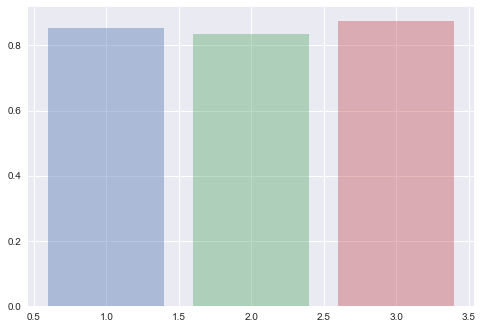

In [158]:
plt.bar(x=[1], height=treatment_pivot[0][0], alpha=0.4)
plt.bar(x=[2], height=treatment_pivot[1][0], alpha=0.4)
plt.bar(x=[3], height=treatment_pivot[2][0], alpha=0.4)

In [191]:
# посмотрим на то, как цена оплата зависит от проговоренных минут, для исследования
def w(x, y):
    x = x.copy()
    x = np.hstack((np.ones(shape=(len(x), 1)), x))
    return np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

In [202]:
print('Day:\n', w(data[['day_mins']].values, data[['day_charge']].values))
print('Eve:\n', w(data[['eve_mins']].values, data[['eve_charge']].values))
print('Night:\n', w(data[['night_mins']].values, data[['night_charge']].values))
print('Intl:\n', w(data[['intl_mins']].values, data[['intl_charge']].values))

Day:
 [[0.00061344]
 [0.1699996 ]]
Eve:
 [[0.00025079]
 [0.0849998 ]]
Night:
 [[-0.00010713]
 [ 0.04500095]]
Intl:
 [[0.00062046]
 [0.26998942]]


In [203]:
print('Day:\n', w(treated_subset[['day_mins']].values, treated_subset[['day_charge']].values))
print('Eve:\n', w(treated_subset[['eve_mins']].values, treated_subset[['eve_charge']].values))
print('Night:\n', w(treated_subset[['night_mins']].values, treated_subset[['night_charge']].values))
print('Intl:\n', w(treated_subset[['intl_mins']].values, treated_subset[['intl_charge']].values))

Day:
 [[0.00046807]
 [0.17000003]]
Eve:
 [[0.00031097]
 [0.08499931]]
Night:
 [[0.0005073 ]
 [0.04499777]]
Intl:
 [[0.00086682]
 [0.26996519]]


In [204]:
treated0 = data[data['treatment'] == 0]
treated2 = data[data['treatment'] == 2]

In [205]:
print('Day:\n', w(treated0[['day_mins']].values, treated0[['day_charge']].values))
print('Eve:\n', w(treated0[['eve_mins']].values, treated0[['eve_charge']].values))
print('Night:\n', w(treated0[['night_mins']].values, treated0[['night_charge']].values))
print('Intl:\n', w(treated0[['intl_mins']].values, treated0[['intl_charge']].values))

Day:
 [[0.00074442]
 [0.16999922]]
Eve:
 [[0.0004278 ]
 [0.08499875]]
Night:
 [[-0.00053876]
 [ 0.04500289]]
Intl:
 [[0.0003567 ]
 [0.27001639]]


In [206]:
print('Day:\n', w(treated2[['day_mins']].values, treated2[['day_charge']].values))
print('Eve:\n', w(treated2[['eve_mins']].values, treated2[['eve_charge']].values))
print('Night:\n', w(treated2[['night_mins']].values, treated2[['night_charge']].values))
print('Intl:\n', w(treated2[['intl_mins']].values, treated2[['intl_charge']].values))

Day:
 [[0.00062392]
 [0.16999955]]
Eve:
 [[2.43934144e-07]
 [8.50014134e-02]]
Night:
 [[-0.00033408]
 [ 0.04500236]]
Intl:
 [[0.00066702]
 [0.26998335]]


In [221]:
def proportion_ztest(sample1, sample2, aplha=0.05, alternative='two-sided'):
    assert alternative in ['two-sided', 'less', 'larger'], 'Alternative should be "two-sided", "less" or "larger"'
    n1,n2 = sample1.size, sample2.size  # размеры выборок
    m1,m2 = sample1.sum(), sample2.sum()  # число успехов

    p1, p2 = sample1.mean(), sample2.mean()  # точеные оценки долей 
    diff = p1 - p2  # разность долей

    P = (m1 + m2)/(n1 + n2)          
    diff_std = np.sqrt(P*(1 - P)*(1/n1 + 1/n2))  # стандартное отклонение разности

    z_obs = diff/diff_std  # наблюдаемое значение статистики
    
    if alternative == 'two-sided':
        pvalue = 2 * (1 - sts.norm.cdf(abs(z_obs)))  # двухсторонняя альтернатива
    elif alternative == 'larger':
        pvalue = 1 - sts.norm.cdf(abs(z_obs))
    elif alternative == 'less':
        pvalue = sts.norm.cdf(abs(z_obs))
        
    return z_obs, pvalue

In [244]:
# отличия treatment=0 от контрольной группы treatment=1 статистически незначимо
proportion_ztest(treated0.churn.values, treated_subset.churn.values)[1]

0.2283311639045107

In [245]:
# отличия treatment=2 от контрольной группы treatment=1 статистически значимо
proportion_ztest(treated2.churn.values, treated_subset.churn.values)[1]

0.009348084294451109

In [285]:
# отличия treatment=0 от контрольной группы treatment=1 статистически незначимо
treatment_pivot = pd.pivot_table(data, values='Unnamed: 0', index='churn', columns='treatment', aggfunc='count')
cramer_test(treatment_pivot.values[:, :2])

(0.025510281498059947, 0.22833116390450592)

In [286]:
# отличия treatment=2 от контрольной группы treatment=1 статистически значимо
cramer_test(treatment_pivot.values[:, 1:])

(0.05541203496795233, 0.00934808429445333)

In [288]:
# в целом значения статистически значимы
cramer_test(treatment_pivot.values)

(0.04499526391714285, 0.03425399098362547)

In [299]:
# отличие между двумя видами treatmenta статистически незначимо
cramer_test(treatment_pivot.reset_index().loc[:, [0, 2]].values)

(0.02997057024425845, 0.15642468860506997)